<a href="https://colab.research.google.com/github/Dasrunaik/AssignMents-ExcelR/blob/main/Assignment_12_EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from os import ST_NOSUID
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [44]:
df=pd.read_csv('/content/adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [46]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [47]:
df.isnull()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [49]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [50]:
df.dropna(inplace=True)

Scaling Techniques

In [51]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns
num_features


Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [52]:
# Standard Scaling
standard_scaled = pd.DataFrame(StandardScaler().fit_transform(df[num_features]), columns=num_features)
standard_scaled


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [53]:
# Min-Max Scaling
minmax_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df[num_features]), columns=num_features)
minmax_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


**Encoding Techniques**

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
df_encoded=df.copy()
df_encoded

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [56]:
# Apply encodings
for col in df_encoded.select_dtypes(include='object').columns:
    if df_encoded[col].nunique() <= 5:
        df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)
    else:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


**Feature Engineering**

In [57]:
# New features
df_encoded['capital_diff'] = df_encoded['capital_gain'] - df_encoded['capital_loss']
df_encoded['hours_per_week_bin'] = pd.cut(df_encoded['hours_per_week'], bins=3, labels=['Low', 'Medium', 'High'])


In [58]:
# Transform skewed feature
df_encoded['log_capital_gain'] = np.log1p(df_encoded['capital_gain'])

capital_diff provides a net gain/loss view.

hours_per_week_bin captures working category.

log_capital_gain reduces skew and stabilizes variance.



**Feature Selection**

Isolation Forest for Outlier Detection

In [59]:
from sklearn.ensemble import IsolationForest

In [60]:
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df_encoded[num_features])
df_encoded['outlier'] = outliers
df_encoded = df_encoded[df_encoded['outlier'] == 1].drop(columns='outlier')

In [61]:
df_encoded

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,capital_diff,hours_per_week_bin,log_capital_gain
0,39,7,77516,9,13,4,1,1,2174,0,...,39,False,False,False,True,True,False,2174,Medium,7.684784
1,50,6,83311,9,13,2,4,0,0,0,...,39,False,False,False,True,True,False,0,Low,0.000000
2,38,4,215646,11,9,0,6,1,0,0,...,39,False,False,False,True,True,False,0,Medium,0.000000
3,53,4,234721,1,7,2,6,0,0,0,...,39,False,True,False,False,True,False,0,Medium,0.000000
4,28,4,338409,9,13,2,10,5,0,0,...,5,False,True,False,False,False,False,0,Medium,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,...,39,False,False,False,True,False,False,0,Medium,0.000000
32557,40,4,154374,11,9,2,7,0,0,0,...,39,False,False,False,True,True,True,0,Medium,0.000000
32558,58,4,151910,11,9,6,1,4,0,0,...,39,False,False,False,True,False,False,0,Medium,0.000000
32559,22,4,201490,11,9,4,1,3,0,0,...,39,False,False,False,True,True,False,0,Low,0.000000


PPS Score and Correlation

In [62]:
!pip install pandas==1.5.3

In [63]:
from sklearn.feature_selection import mutual_info_classif


In [64]:
X = df_encoded.drop(columns='income_ >50K')  # or whatever the correct name is
y = df_encoded['income_ >50K']

In [65]:
X_numeric = pd.get_dummies(X, drop_first=True)

In [66]:
mi_scores = mutual_info_classif(X_numeric, y, discrete_features='auto')
mi_df = pd.DataFrame({'Feature': X_numeric.columns, 'MI Score': mi_scores})
mi_df.sort_values(by='MI Score', ascending=False, inplace=True)

In [67]:
mi_df.head(10)

,Feature,MI Score
7,relationship,0.112968
17,capital_diff,0.112627
5,marital_status,0.107554
18,log_capital_gain,0.076454
8,capital_gain,0.074210
0,age,0.066619
4,education_num,0.065077
6,occupation,0.062566
3,education,0.060656
10,hours_per_week,0.038480


Correlation

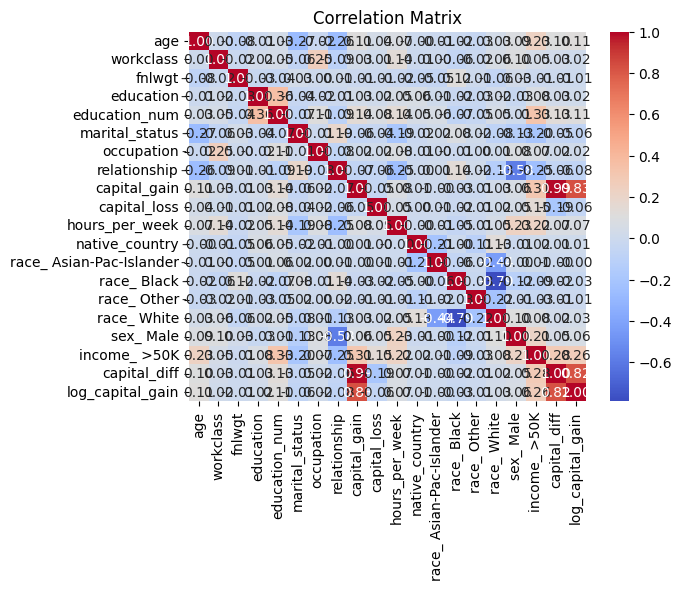

In [68]:
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()